## Calculate national-level intersects of butterfly data

* Read in the butterfly data
* Read in national shapes
* Count intersecting points for a given national shape
* Create a simple data table, export as csv

In [2]:
import pandas as pd
import geopandas as gpd
import shapely
%matplotlib inline

In [3]:
df = pd.read_csv('../GBIF_data/output.csv')

In [4]:
df.head()

,decimallatitude,decimallongitude,date,year,species
0,50.97904,3.10683,2000-09-01,2000,3
1,50.84415,2.89347,2003-05-28,2003,3
2,51.11305,3.46429,2000-06-20,2000,3
3,51.11305,3.46429,2000-06-25,2000,3
4,51.11305,3.46429,2000-07-20,2000,3


In [5]:

def point_maker(lon, lat):
    return shapely.geometry.Point(lon, lat)

In [6]:
rows =[]
points = []
for val in df.values[0:1000]:
    lat, lon, date, year, species = val
    points.append(point_maker(lon,lat))
    rows.append([ date, year, species])

In [13]:
#test_point = shapely.geometry.Point(df['decimallongitude'][0],df['decimallatitude'][0])

In [55]:
#gpd.GeoDataFrame.

In [7]:
series = gpd.GeoDataFrame(rows, crs='epsg:4326', geometry=points, columns=['date','year','species'])

In [8]:
series.head()

,date,year,species,geometry
0,2000-09-01,2000,3,POINT (3.10683 50.97904000000001)
1,2003-05-28,2003,3,POINT (2.89347 50.84415)
2,2000-06-20,2000,3,POINT (3.46429 51.11305)
3,2000-06-25,2000,3,POINT (3.46429 51.11305)
4,2000-07-20,2000,3,POINT (3.46429 51.11305)


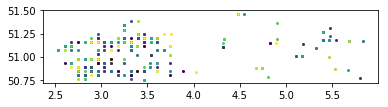

In [37]:
series[0:1000].plot()

In [10]:
nations = gpd.read_file('/Users/Ben/Downloads/TM_WORLD_BORDERS-0/TM_WORLD_BORDERS-0.3.shp')

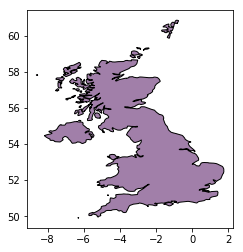

In [11]:
nations[nations.NAME == 'United Kingdom'].plot()

In [12]:
#loci = uk.geometry.intersects(series.geometry)

In [13]:
uk = nations[nations.NAME == 'United Kingdom']
uk

,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN,geometry
206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826,"(POLYGON ((-6.290832999999964 49.912216, -6.31..."


In [91]:
from geopandas.tools import overlay

In [95]:
lx = series.intersection?

In [96]:
lx = series.intersects?

In [122]:
lx = series.geometry.intersects(uk)

series[lx]

,date,year,species,geometry


In [16]:
print(uk.crs)
print(series.crs)

{'init': 'epsg:4326'}
epsg:4326


'epsg:4326'

In [24]:
test= series.buffer(0.05)

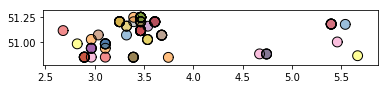

In [25]:
test[0:100].plot()

In [41]:
intersecting_points = gpd.overlay(uk, series.buffer(0.5), how='intersection')

NotImplementedError: overlay currently only implemented for GeoDataFrames